In [9]:
!pip install ultralytics -q

import ultralytics
from ultralytics import YOLO
import os
import shutil
import yaml
from google.colab import drive

if not os.path.exists('/content/drive'):
    print("Mounting Google Drive...")
    drive.mount('/content/drive')

drive_path = '/content/drive/MyDrive/car'
local_path = '/content/car_data'

if os.path.exists(local_path):
    shutil.rmtree(local_path)

shutil.copytree(drive_path, local_path)
class_names = [
    'boot', 'car', 'door', 'front_bumper', 'front_grill',
    'front_windshield', 'headlamp', 'hood', 'license_plate',
    'panel', 'rear_bumper', 'rear_windshield', 'sideview_mirror',
    'taillamp', 'wheel', 'window'
]

data_config = {
    'path': local_path,
    'train': 'train/images',
    'val': 'valid/images',
    'test': 'test/images',
    'nc': 16,
    'names': class_names
}

yaml_path = '/content/car_body_parts_local.yaml'
with open(yaml_path, 'w') as f:
    yaml.dump(data_config, f)

⚡ Starting FAST Training (Optimized)...
Ultralytics 8.3.249 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/car_body_parts_local.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=10, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=body_parts_fast_run, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap

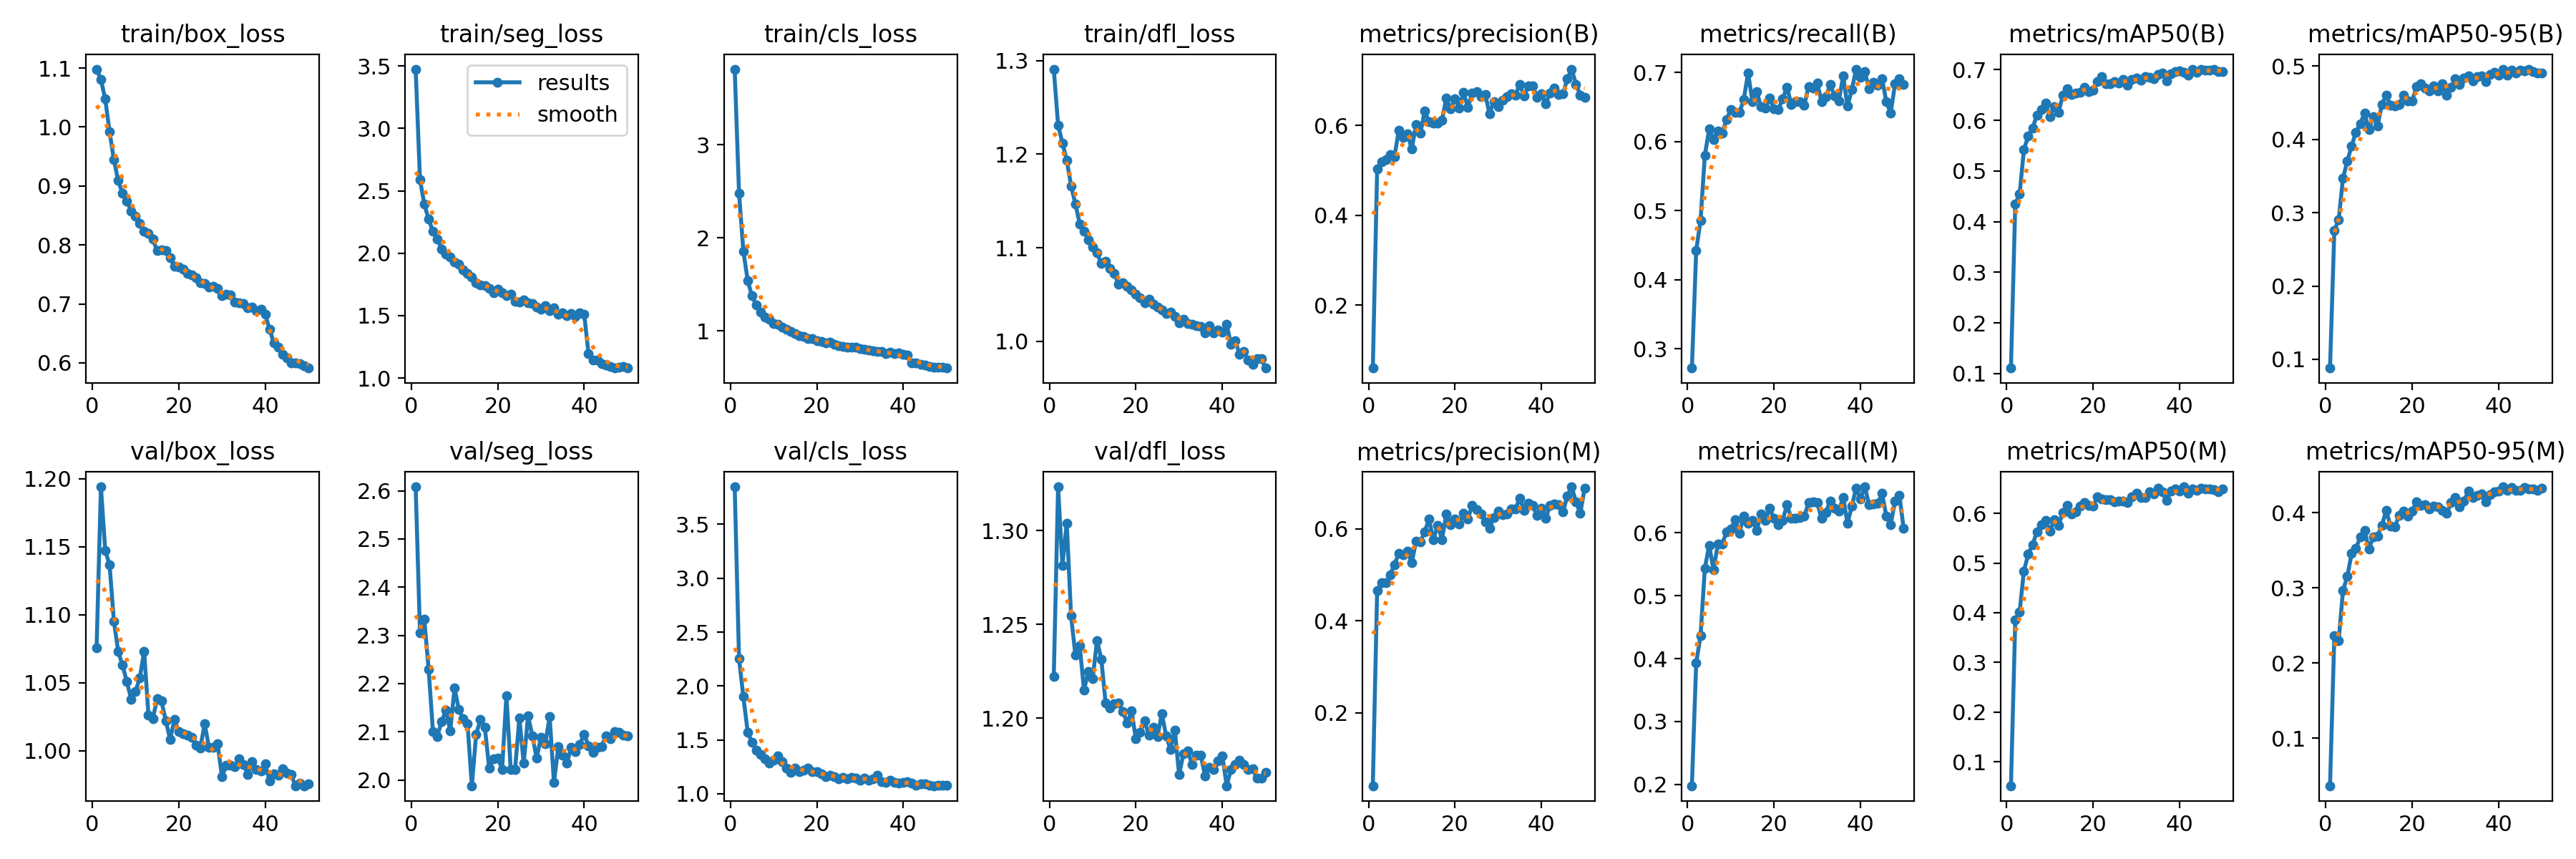


--- Confusion Matrix ---


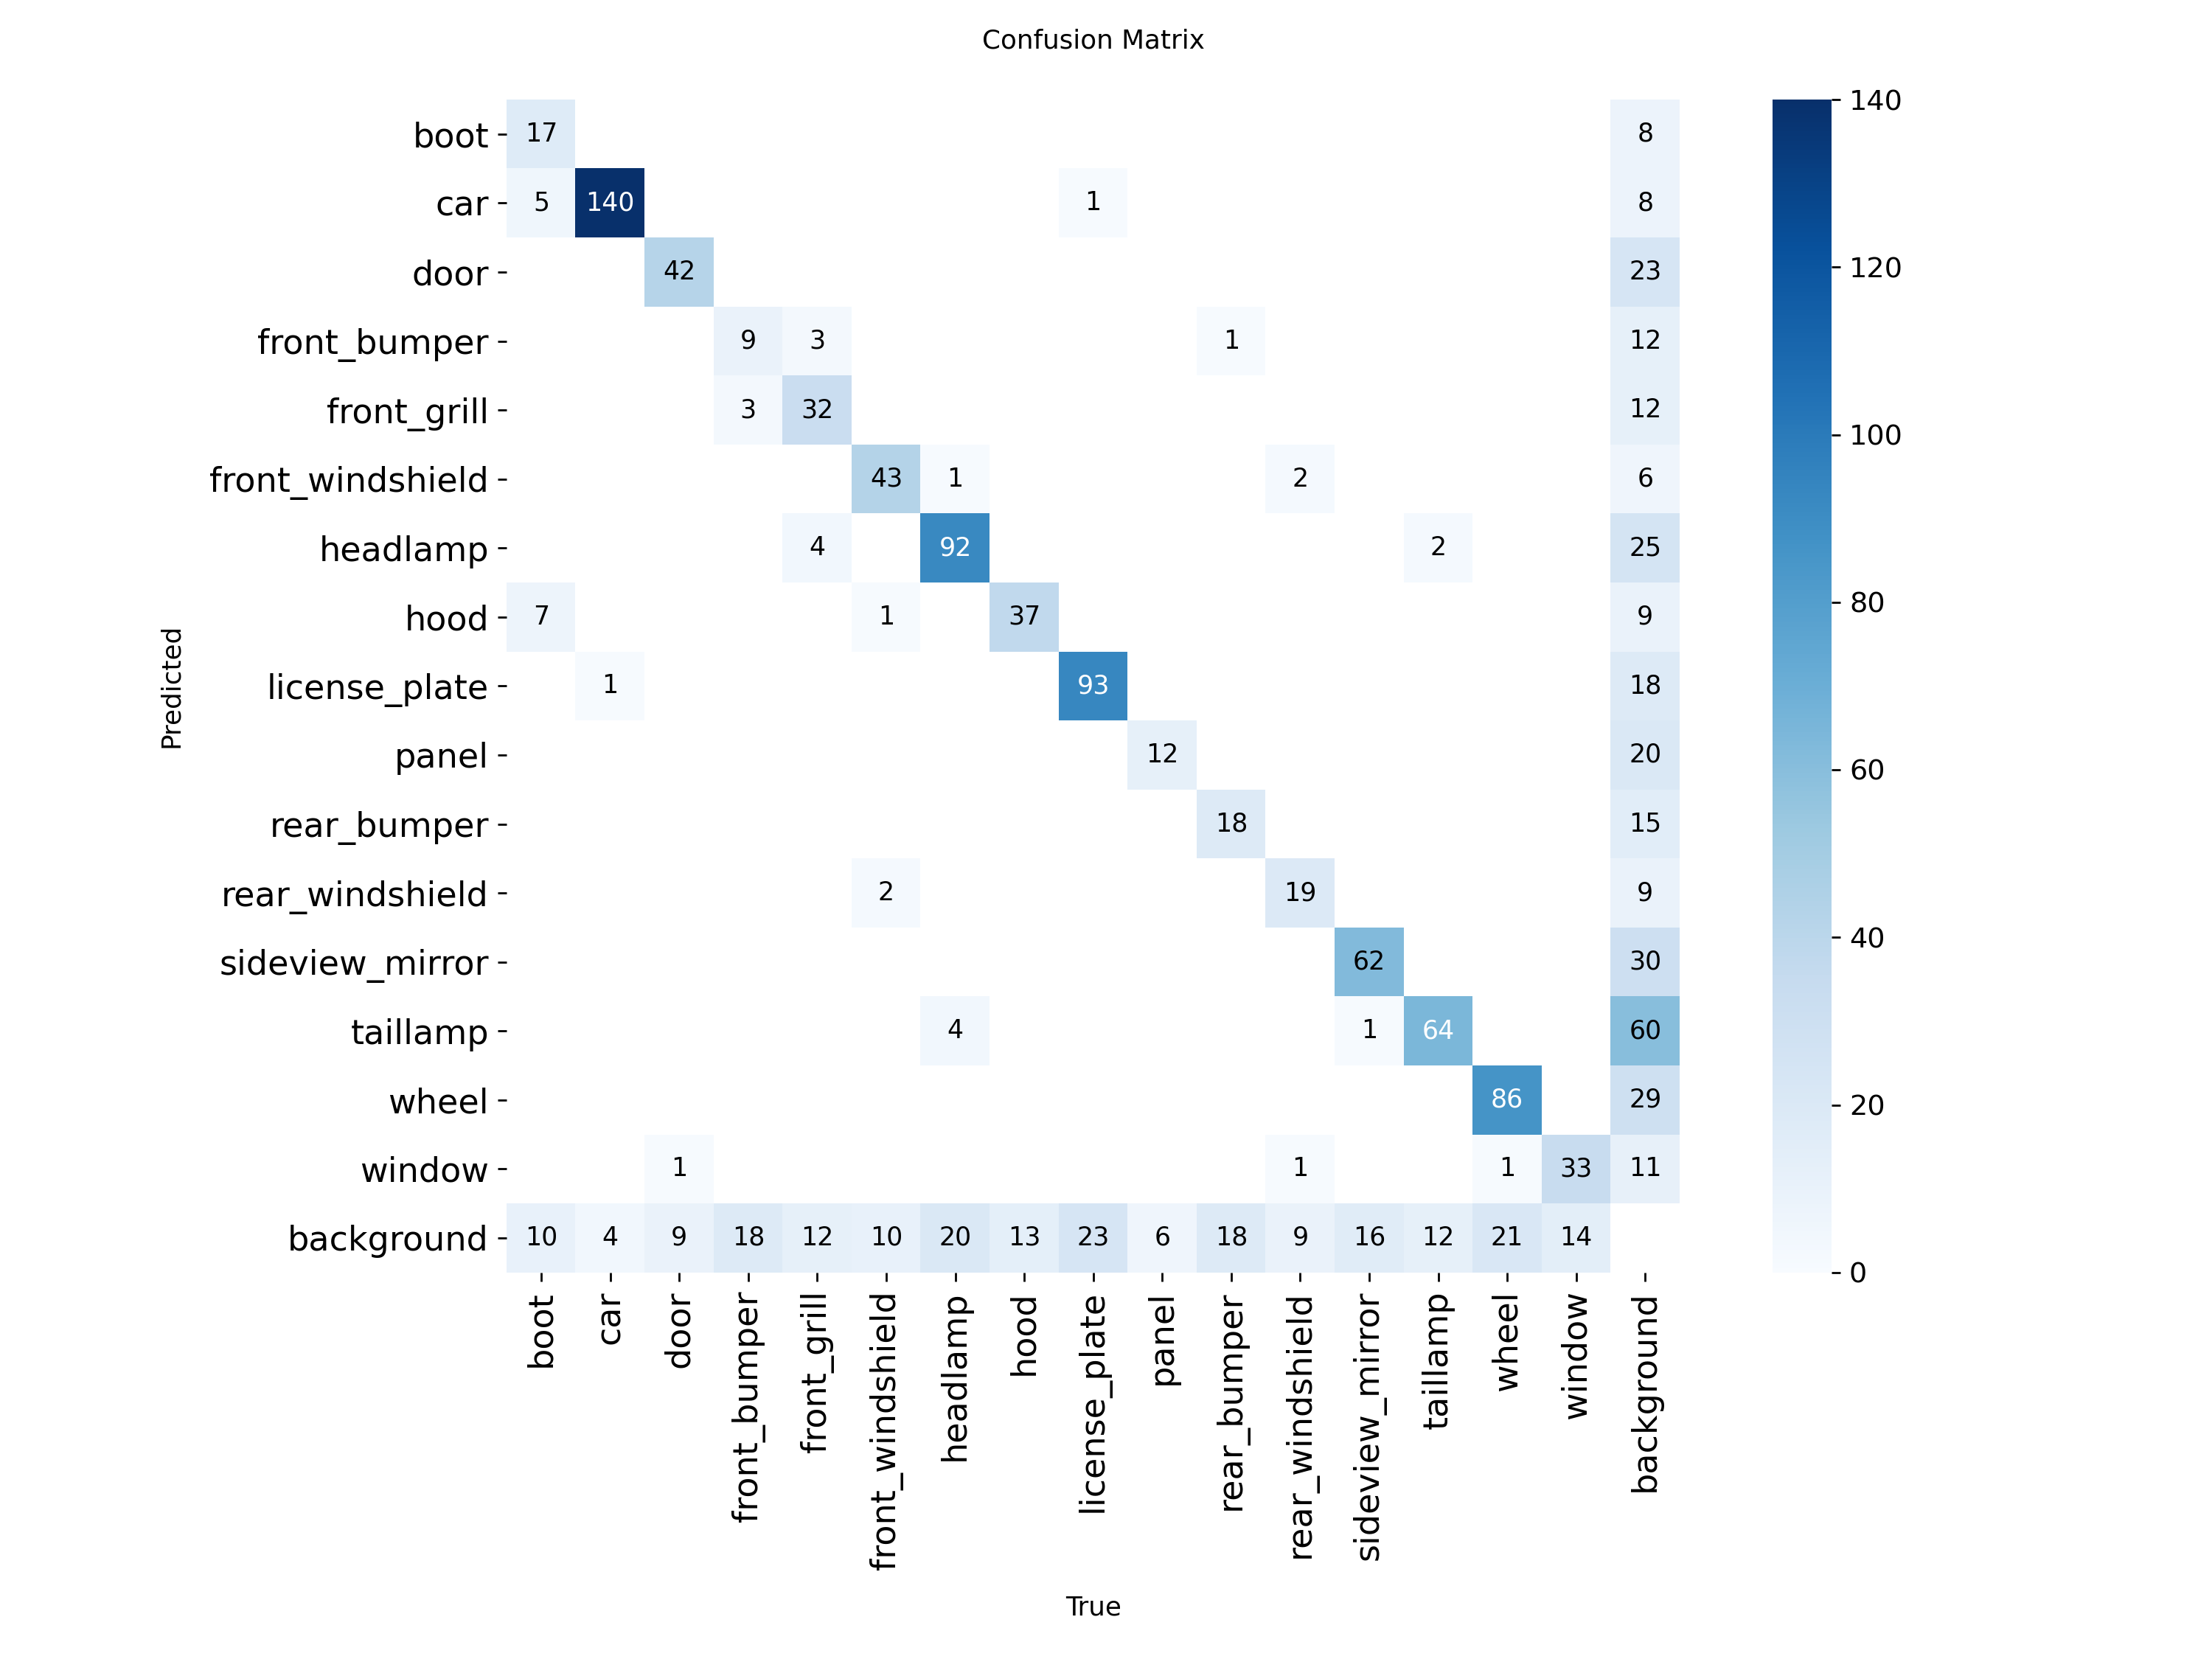


--- Confusion Matrix (Normalized) ---


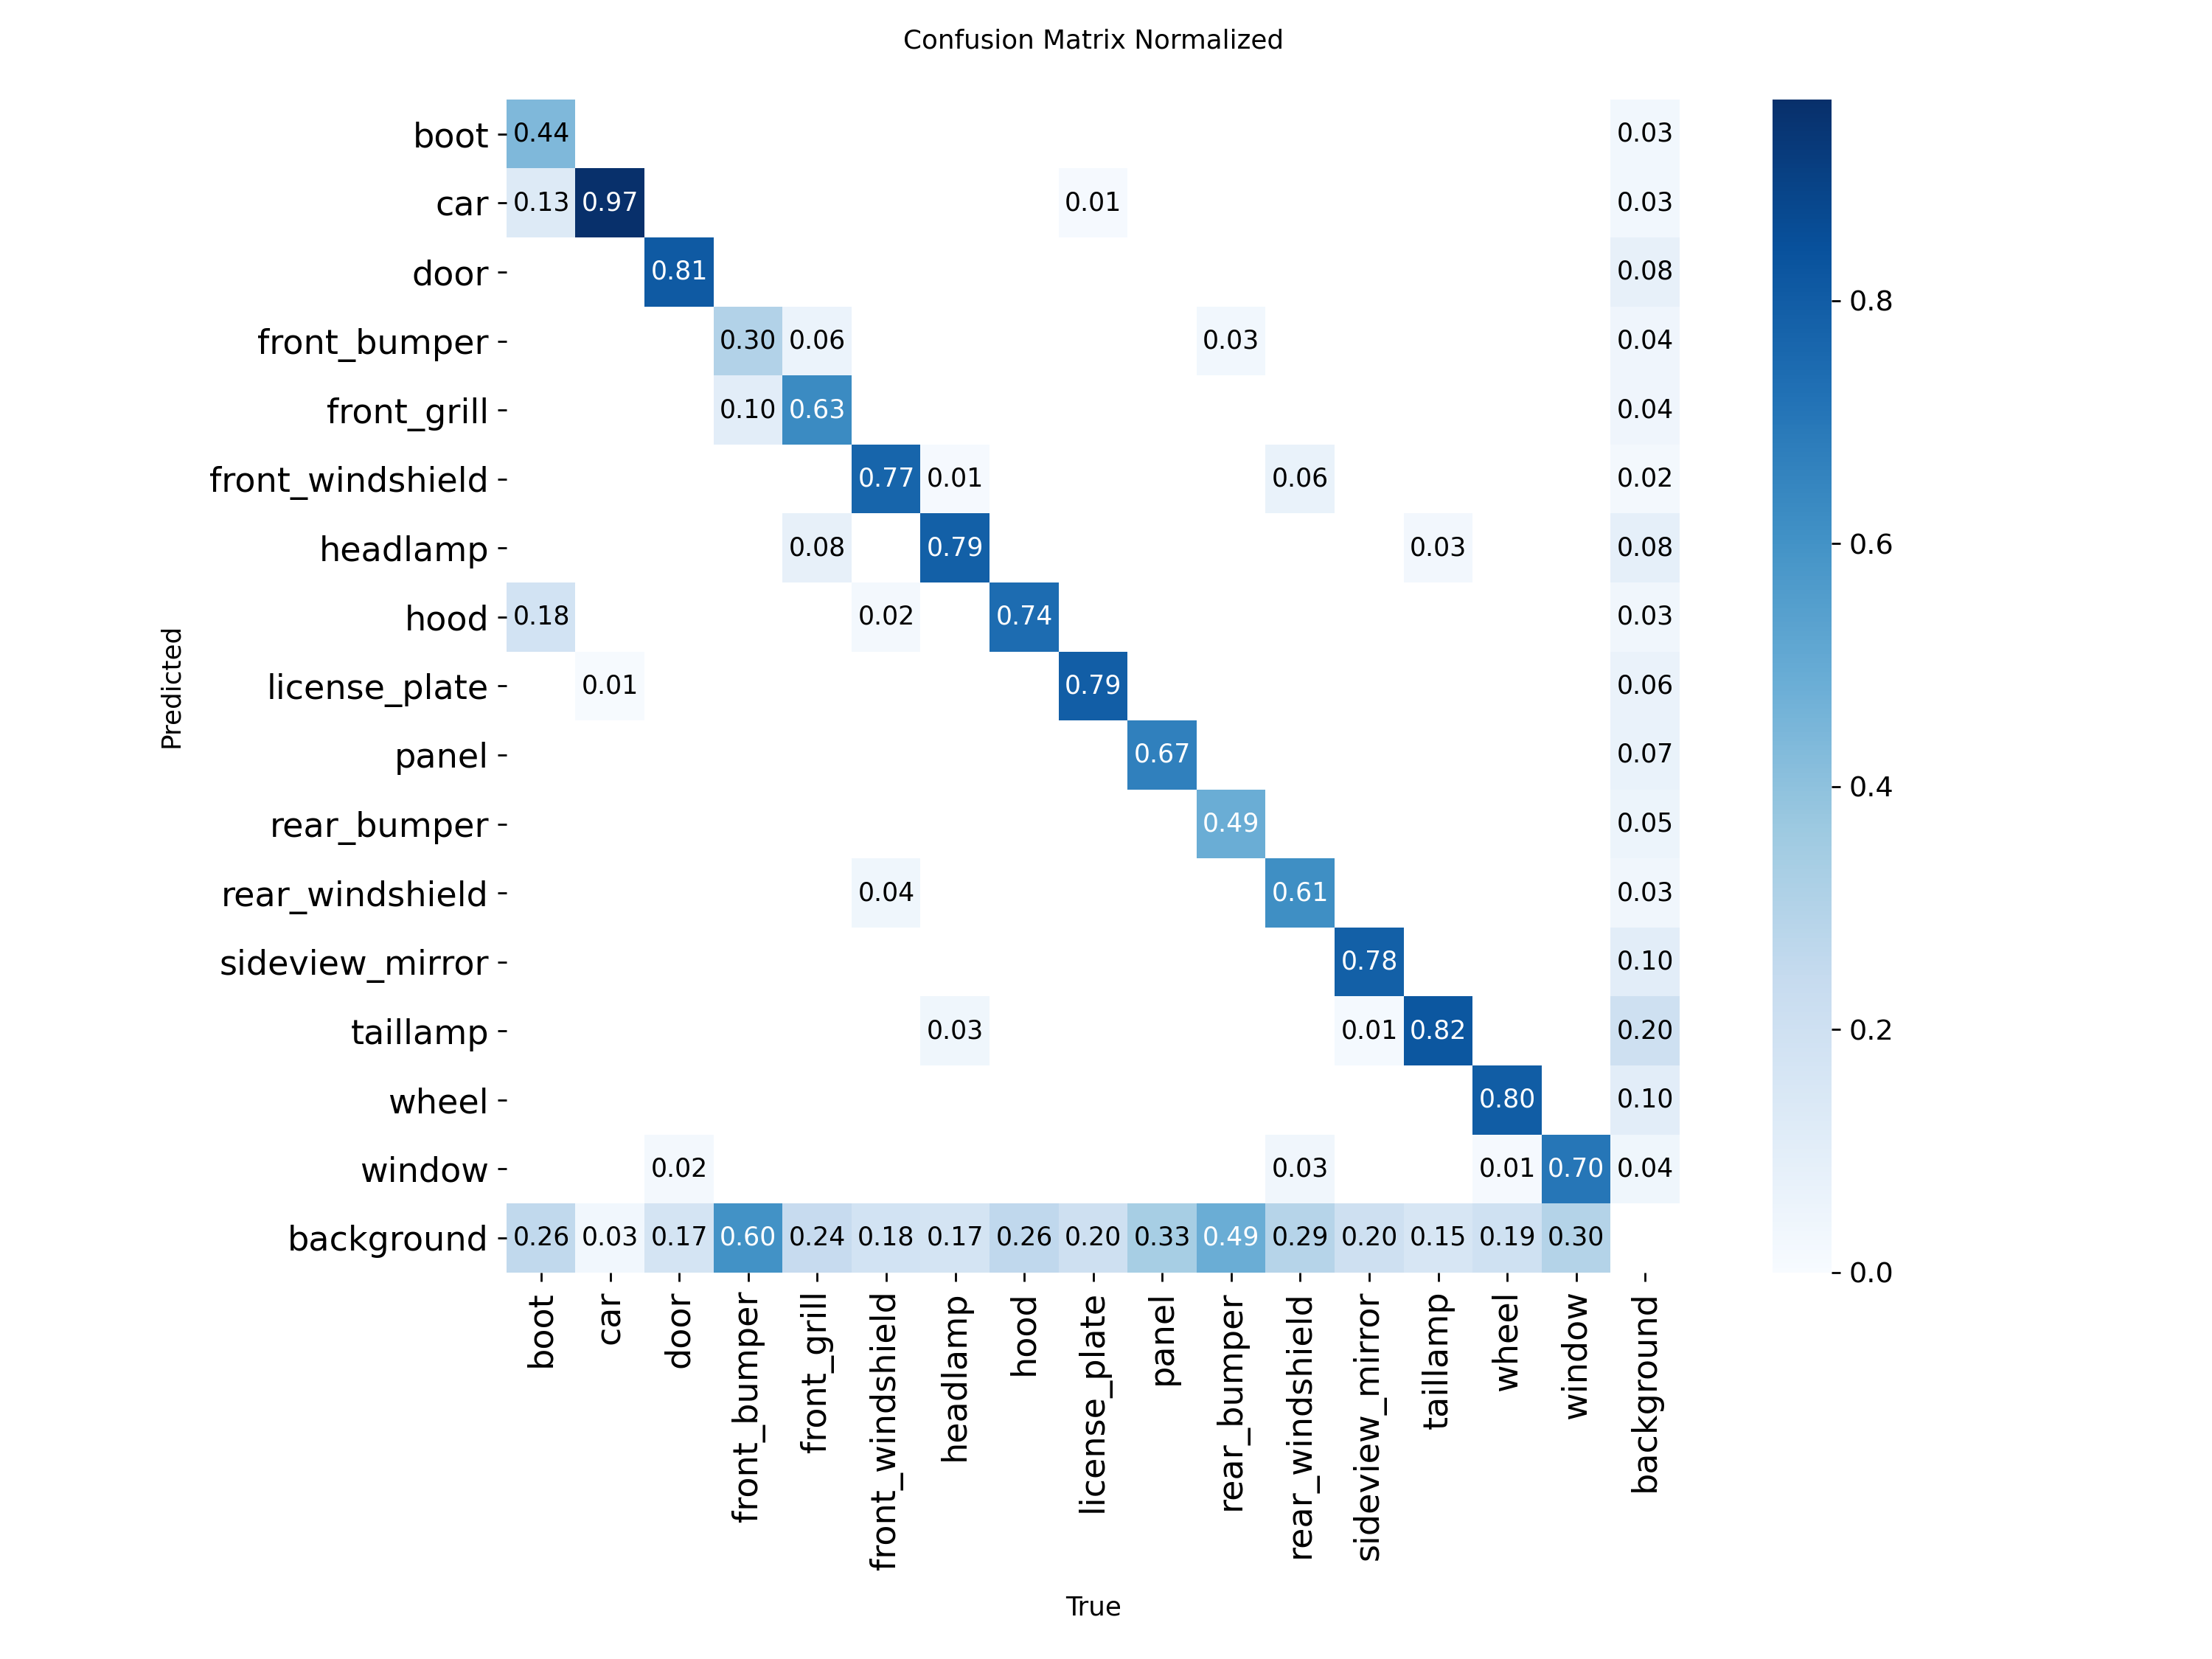


✅ DONE! Results saved in: /content/runs/segment/body_parts_fast_run


In [8]:
from ultralytics import YOLO
from IPython.display import Image, display
import os

model = YOLO('yolov8n-seg.pt')
# (If accuracy drops too much, try: 'yolov8s-seg.pt')
results = model.train(
    data='/content/car_body_parts_local.yaml',
    epochs=50,
    imgsz=416,
    batch=32,
    workers=4,
    cache=True,
    amp=True,
    patience=10,
    name='body_parts_fast_run',
    pretrained=True,
    freeze=10,
    plots=True
)

print("\n VISUALIZING RESULTS...")
run_dir = '/content/runs/segment/body_parts_fast_run'

def show_result(filename, title):
    path = os.path.join(run_dir, filename)
    if os.path.exists(path):
        print(f"\n--- {title} ---")
        display(Image(filename=path, width=600))
    else:
        print(f"\n {title} not found.")

show_result('results.png', 'Training Results Summary')
show_result('confusion_matrix.png', 'Confusion Matrix')
show_result('confusion_matrix_normalized.png', 'Confusion Matrix (Normalized)')

print(f"\n DONE! Results saved in: {run_dir}")
